In [1]:
# Import necessary libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import math
import sys
from sklearn.decomposition import PCA

In [2]:
# Read input data
inputData = pd.read_csv("Dataset 1.txt", sep='\t', lineterminator='\n', header=None)

In [3]:
# Divide data and ground truth clusters
data = inputData[inputData.columns[2:]]
groundTruthClusters = inputData[inputData.columns[1:2]]

In [4]:
# Assign parameters
numberOfClusters = 2
sigmaValue = 1

In [5]:
# Retrieve all the initial centroids
centroidListParameter = "1,3"
centroidList = centroidListParameter.split(",")

In [6]:
###########################################
# Function to calculate Gaussian kernel
###########################################
def rbfKernel(x,y,sigmaValue):
    
    # Calculate the euclidean distance between the two data points
    euclideanDistance = np.linalg.norm(x-y)
    
    # Calculate the gaussian value based on the calculated euclidean distance between the two data points
    gaussianValue = np.exp(-(math.pow(euclideanDistance,2))/(math.pow(sigmaValue,2)))
    
    return gaussianValue

In [7]:
# Initialize the adjacency matrix with zeros
adjacencyMatrix = np.zeros((len(data),len(data)));

# Calculate the Adjacency Matrix
for i in range(len(data)):
    for j in range(len(data)):
        adjacencyMatrix[i][j] = rbfKernel((data.to_numpy())[i],(data.to_numpy())[j],sigmaValue)

In [8]:
# Initialize the adjacency matrix with zeros
degreeMatrix = np.zeros((len(data),len(data)));

# Calculate the Degree Matrix
for i in range(len(data)):
    degreeMatrix[i][i] = adjacencyMatrix[i].sum() - 1

In [9]:
# Create a digonal matrix of 1
diagonalMatrixOfOnes = np.zeros((len(data), len(data)), int)
np.fill_diagonal(diagonalMatrixOfOnes,1)

In [10]:
# Calculate Lapacian Matrix
laplacianMatrix = degreeMatrix - adjacencyMatrix + diagonalMatrixOfOnes

In [11]:
# Eigen Decomposition
eigenValues , eigenVectors = np.linalg.eig(laplacianMatrix)

In [12]:
# Sort the eigen vectors in an ascending order
ind = np.argsort(eigenValues)
eigenValues = eigenValues[ind]
eigenVectors = eigenVectors[:,ind]

In [13]:
#######################################################################
# calculate k(number of eigen vectors to select) based on Eigen_Gap
#######################################################################
def eigenGap(eigenValues):
    maxGap = 0.0
    k = -1
    for i in range(1,len(eigenValues)):
        if(eigenValues[i] - eigenValues[i-1]) >= maxGap:
            maxGap = eigenValues[i] - eigenValues[i-1]
            k = i + 1
    return k

In [14]:
# Determine how many eigenvectors to select
numberOfEigenVectors = eigenGap(eigenValues)

In [15]:
# Create the new dataset based on the numberOfEigenVectors determined by the eigengap
newData = eigenVectors[:,:numberOfEigenVectors]

In [16]:
# Retrieve all the centroids for kmeans initialization
initialCentroids = []
for i in centroidList:
    initialCentroids.append(newData[int(i)])
initialCentroids = np.asarray(initialCentroids)

In [17]:
# Perform kmeans on the new dataset
kmeans = KMeans(n_clusters=numberOfClusters,init=initialCentroids,n_init=1,random_state=1231)
kmeans = kmeans.fit(newData)
labels = kmeans.predict(newData)
centroids = kmeans.cluster_centers_

In [18]:
#######################################################################
# Function to compute and plot PCA
#######################################################################
def plotPCA(data,labels):
    pca = PCA(n_components=2)
    data = np.matrix(data.T)
    pca.fit(data)
    pcaComponents = pca.components_
    plt.figure(figsize=(8,8))
    pc1 = pcaComponents[0,]
    pc2 = pcaComponents[1,]
    setOfLabels = list(set(labels))
    colours = []
    for i in setOfLabels:
        colours.append(plt.cm.jet(float(i)/max(setOfLabels)))
    for i in range(len(setOfLabels)):
        j = i
        x = []
        y = []
        for p in range(len(pc1)):
            if labels[p] == j:
                x.append(pc1[p])
        for q in range(len(pc1)):
            if labels[q] == j:
                y.append(pc2[q])
        plt.scatter(x, y, c=colours[i], label=str(j))
    plt.legend()
    plt.title("Dataset 1")
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


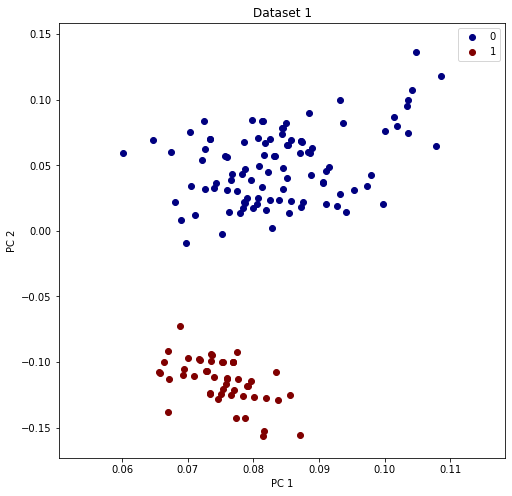

In [19]:
plotPCA(data.values,labels)

In [20]:
#######################################################################
# Function to compute Jaccard coefficient and Rand index
#######################################################################
def metric(data,groundTruthClusters,output):
    m11=0
    m10=0
    m01=0
    m00=0
    
    for i in range(0,len(data)):
        for j in range(1,len(data)):
            if((groundTruthClusters.to_numpy())[i] == (groundTruthClusters.to_numpy())[j] and output[i] == output[j]):
                m11=m11+1
            elif((groundTruthClusters.to_numpy())[i] == (groundTruthClusters.to_numpy())[j] and not (output[i] == output[j])):
                m10=m10+1
            elif(not((groundTruthClusters.to_numpy())[i] == (groundTruthClusters.to_numpy())[j]) and output[i] == output[j]):
                m01=m01+1
            elif(not((groundTruthClusters.to_numpy())[i] == (groundTruthClusters.to_numpy())[j]) and not(output[i] == output[j])):
                m00=m00+1

    jacard_coeff=float(m11)/float((m11+m01+m10))
    print("Jaccard Coefficient: ", jacard_coeff)
    rand_index=float((m11+m00))/float((m11+m00+m10+m01))
    print("Rand Index: ", rand_index)

In [21]:
# Compute Jaccard coefficient and Rand index
metric(data,groundTruthClusters,labels)

Jaccard Coefficient:  0.5983935742971888
Rand Index:  0.7762863534675615
